In [1]:
!pip install ipython-autotime
%load_ext autotime

Defaulting to user installation because normal site-packages is not writeable
time: 0 ns (started: 2022-11-21 20:50:03 +05:30)


In [2]:
#import statements
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

time: 4 s (started: 2022-11-21 20:50:12 +05:30)


In [3]:
#creating dataset
computer=[['A','high','no','fair','no'],['A','high','no','excellent','no'],['B','high','no','fair','yes'],['C','medium','no','fair','yes'],['C','low','yes','fair','yes'],
            ['C','low','yes','excellent','no'],['B','low','yes','excellent','yes'],['A','medium','no','fair','no'],['A','low','yes','fair','yes'],['C','medium','yes','fair','yes'],
            ['A','medium','yes','excellent','yes'],['B','medium','no','excellent','yes'],['B','high','yes','fair','yes'],['C','medium','no','excellent','no']]
computer = pd.DataFrame(computer,columns=['age','income','student','credit_rating','buys_computer'])
print(computer)

   age  income student credit_rating buys_computer
0    A    high      no          fair            no
1    A    high      no     excellent            no
2    B    high      no          fair           yes
3    C  medium      no          fair           yes
4    C     low     yes          fair           yes
5    C     low     yes     excellent            no
6    B     low     yes     excellent           yes
7    A  medium      no          fair            no
8    A     low     yes          fair           yes
9    C  medium     yes          fair           yes
10   A  medium     yes     excellent           yes
11   B  medium      no     excellent           yes
12   B    high     yes          fair           yes
13   C  medium      no     excellent            no
time: 31 ms (started: 2022-11-21 20:50:25 +05:30)


In [4]:
#prior probability
prob = []
count = computer['buys_computer'].count()
class_count = list(computer['buys_computer'].value_counts())
for i in class_count:
  prob.append(i/count)
print(prob)

[0.6428571428571429, 0.35714285714285715]
time: 15 ms (started: 2022-11-21 20:50:37 +05:30)


In [5]:
#class conditional densities
class_conditional_yes = []
class_conditional_no = []
yes_dataset = computer[computer['buys_computer']=='yes']
no_dataset = computer[computer['buys_computer']=='no']
for i in yes_dataset.columns:
  class_conditional_yes.append(yes_dataset[i].value_counts()/yes_dataset[i].count())
print('Class Conditional Probabilities for Class YES')
for i in range(len(class_conditional_yes)-1):
  print(class_conditional_yes[i])

print('')

for i in no_dataset.columns:
  class_conditional_no.append(no_dataset[i].value_counts()/no_dataset[i].count())
print('Class Conditional Probabilities for Class NO')
for i in range(len(class_conditional_no)-1):
  print(class_conditional_no[i])

Class Conditional Probabilities for Class YES
B    0.444444
C    0.333333
A    0.222222
Name: age, dtype: float64
medium    0.444444
low       0.333333
high      0.222222
Name: income, dtype: float64
yes    0.666667
no     0.333333
Name: student, dtype: float64
fair         0.666667
excellent    0.333333
Name: credit_rating, dtype: float64

Class Conditional Probabilities for Class NO
A    0.6
C    0.4
Name: age, dtype: float64
high      0.4
medium    0.4
low       0.2
Name: income, dtype: float64
no     0.8
yes    0.2
Name: student, dtype: float64
excellent    0.6
fair         0.4
Name: credit_rating, dtype: float64
time: 32 ms (started: 2022-11-21 20:50:54 +05:30)


In [6]:
computer1 = [[-1,1,0,-1,0],[-1,1,0,1,0],[0,1,0,-1,1],[1,1,0,-1,1],[1,-1,1,-1,1],
            [1,-1,1,1,0],[0,-1,1,1,1],[-1,0,0,-1,0],[-1,-1,1,-1,1],[1,0,1,-1,1],
            [-1,0,1,1,1],[0,0,0,1,1],[0,1,1,-1,1],[1,0,0,1,0]]
computer1 = pd.DataFrame(computer1,columns=['age','income','student','credit_rating','buys_computer'])
print(computer1)

    age  income  student  credit_rating  buys_computer
0    -1       1        0             -1              0
1    -1       1        0              1              0
2     0       1        0             -1              1
3     1       1        0             -1              1
4     1      -1        1             -1              1
5     1      -1        1              1              0
6     0      -1        1              1              1
7    -1       0        0             -1              0
8    -1      -1        1             -1              1
9     1       0        1             -1              1
10   -1       0        1              1              1
11    0       0        0              1              1
12    0       1        1             -1              1
13    1       0        0              1              0
time: 16 ms (started: 2022-11-21 20:51:08 +05:30)


In [7]:
#independence between attributes
def cosine_similarity(a,b):
    return np.dot(a,b) / ((np.dot(a,a) **.5) * (np.dot(b,b) ** .5))

matrix = []
cosine = []
for i in computer1.columns:
  matrix.append(list(computer1[i]))
for i in range(len(matrix)-1):
  for j in range(i+1,len(matrix)-1):
    print('Cosine between')
    print(matrix[i])
    print(matrix[j])
    value = cosine_similarity(list(matrix[i]),(list(matrix[j])))
    print('Cosine value: ')
    print(value)
    print('')
    if(value == 1 or value == -1):
      print("Vectors are dependent!")

Cosine between
[-1, -1, 0, 1, 1, 1, 0, -1, -1, 1, -1, 0, 0, 1]
[1, 1, 1, 1, -1, -1, -1, 0, -1, 0, 0, 0, 1, 0]
Cosine value: 
-0.21081851067789195

Cosine between
[-1, -1, 0, 1, 1, 1, 0, -1, -1, 1, -1, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
Cosine value: 
0.11952286093343936

Cosine between
[-1, -1, 0, 1, 1, 1, 0, -1, -1, 1, -1, 0, 0, 1]
[-1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1]
Cosine value: 
0.0

Cosine between
[1, 1, 1, 1, -1, -1, -1, 0, -1, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
Cosine value: 
-0.3779644730092272

Cosine between
[1, 1, 1, 1, -1, -1, -1, 0, -1, 0, 0, 0, 1, 0]
[-1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1]
Cosine value: 
-0.2672612419124244

Cosine between
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
[-1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1]
Cosine value: 
-0.10101525445522107

time: 16 ms (started: 2022-11-21 20:51:18 +05:30)


In [8]:
#splitting dataset into train and test
X = computer1.iloc[:,:-1]
y = computer1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

time: 0 ns (started: 2022-11-21 20:51:29 +05:30)


In [9]:
#naive-bayes classifier
clf = GaussianNB()
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.3333333333333333
time: 16 ms (started: 2022-11-21 20:52:03 +05:30)


In [11]:
#reading dataset
energy = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\KAG_energydata_complete.csv")
energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


time: 141 ms (started: 2022-11-21 20:53:01 +05:30)


In [14]:
#classification based on appliance usage from LAB 3
def explore(row: float):
  if row >= 60:
    return 'high'
  else:
    return 'low'

appliance = energy['Appliances'].tolist()
classified_data = []
for i in appliance:
  classified_data.append(explore(i))

energy['class']=classified_data
print(energy)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...     RH_9  \
0      19.200000  44.790000  19.790000  44.730000  19.000

In [15]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,10))
energy[['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','rv1','rv2']] = scaler.fit_transform(energy[['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','rv1','rv2']])
energy_transformed = energy
print(energy_transformed)

                      date  Appliances  lights        T1      RH_1        T2  \
0      2016-01-11 17:00:00          60      30  3.273495  5.661866  2.253453   
1      2016-01-11 17:10:00          60      30  3.273495  5.413265  2.253453   
2      2016-01-11 17:20:00          50      30  3.273495  5.305018  2.253453   
3      2016-01-11 17:30:00          50      40  3.273495  5.240804  2.253453   
4      2016-01-11 17:40:00          60      40  3.273495  5.314191  2.253453   
...                    ...         ...     ...       ...       ...       ...   
19730  2016-05-27 17:20:00         100       0  9.267863  5.376571  7.116550   
19731  2016-05-27 17:30:00          90       0  9.197466  5.360059  7.017688   
19732  2016-05-27 17:40:00         270      10  9.197466  5.386662  6.926512   
19733  2016-05-27 17:50:00         420      10  9.197466  5.494909  6.770535   
19734  2016-05-27 18:00:00         430      10  9.197466  5.387579  6.661705   

           RH_2        T3      RH_3    

In [16]:
#creating feature vector
feature = energy_transformed.iloc[:, 3:29]

time: 16 ms (started: 2022-11-21 20:54:06 +05:30)


In [17]:
#splitting into test and train
X = feature
y = energy['class']
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3)

time: 15 ms (started: 2022-11-21 20:54:15 +05:30)


In [18]:
#naive-bayes classifier
clf1 = GaussianNB()
clf1.fit(X_train1,y_train1)

GaussianNB()

time: 31 ms (started: 2022-11-21 20:54:32 +05:30)


In [19]:
clf1_train = clf1.score(X_train1,y_train1)
clf1_test = clf1.score(X_test1,y_test1)

time: 47 ms (started: 2022-11-21 20:54:42 +05:30)


In [20]:
#applying SVM classifier
clf2 = svm.SVC()
clf2.fit(X_train1, y_train1)

SVC()

time: 7.41 s (started: 2022-11-21 20:54:51 +05:30)


In [21]:
clf2_train = clf2.score(X_train1,y_train1)
clf2_test = clf2.score(X_test1,y_test1)

time: 18 s (started: 2022-11-21 20:55:04 +05:30)


In [22]:
#kernel function = 'poly'
#applying SVM classifier
clf3 = svm.SVC(kernel='poly')
clf3.fit(X_train1, y_train1)

SVC(kernel='poly')

time: 16 s (started: 2022-11-21 20:56:15 +05:30)


In [23]:
clf3_train = clf3.score(X_train1,y_train1)
clf3_test = clf3.score(X_test1,y_test1)

time: 4.59 s (started: 2022-11-21 20:56:39 +05:30)


In [24]:
#K-NN classifier
clf4 = KNeighborsClassifier(n_neighbors = 6)
clf4.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=6)

time: 15 ms (started: 2022-11-21 20:56:50 +05:30)


In [25]:
clf4_train = clf4.score(X_train1, y_train1)
clf4_test = clf4.score(X_test1, y_test1)

time: 7.48 s (started: 2022-11-21 20:57:01 +05:30)


In [26]:
#MLP classifier
clf5 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), random_state=1)
clf5.fit(X_train1, y_train1)

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), random_state=1,
              solver='lbfgs')

time: 625 ms (started: 2022-11-21 20:57:11 +05:30)


In [27]:
clf5_train = clf5.score(X_train1, y_train1)
clf5_test = clf5.score(X_test1, y_test1)

time: 47 ms (started: 2022-11-21 20:57:40 +05:30)


In [28]:
clf6 = DecisionTreeClassifier()
clf6.fit(X_train1,y_train1)

DecisionTreeClassifier()

time: 359 ms (started: 2022-11-21 20:57:50 +05:30)


In [29]:
clf6_train = clf6.score(X_train1, y_train1)
clf6_test = clf6.score(X_test1,y_test1)

time: 31 ms (started: 2022-11-21 20:58:00 +05:30)


In [30]:
graph = [['Gaussian',clf1_train,clf1_test],
         ['SVC',clf2_train,clf2_test],
         ['SVC-Poly',clf3_train,clf3_test],
         ['KNN',clf4_train,clf4_test],
         ['MLP',clf5_train,clf5_test],
         ['Decision-Tree',clf6_train,clf6_test]]
graph = pd.DataFrame(graph)
print(graph)

               0         1         2
0       Gaussian  0.620892  0.611383
1            SVC  0.765021  0.749704
2       SVC-Poly  0.786521  0.772336
3            KNN  0.831113  0.758318
4            MLP  0.728174  0.723358
5  Decision-Tree  1.000000  0.787198
time: 31 ms (started: 2022-11-21 20:58:34 +05:30)


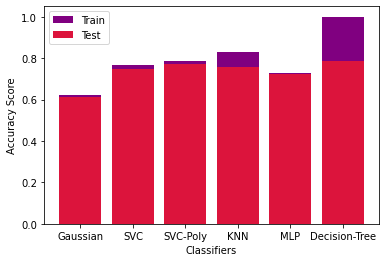

time: 125 ms (started: 2022-11-21 21:10:43 +05:30)


In [47]:
plt.bar(graph[0], graph[1], label = 'Train', color = 'purple')
plt.bar(graph[0], graph[2], label = 'Test', color = 'crimson')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()